# Core Inflation in the US

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.express as px
import joblib

## Import

In [2]:
# Read data
cpi = pd.read_csv("/Users/anoop/Downloads/project_2_data/CPILFESL.csv")
m2 = pd.read_csv("/Users/anoop/Downloads/project_2_data/M2.csv")

# Convert 'observation_date 'to datetime and assign to 'Date'
cpi["Date"] = pd.to_datetime(cpi["observation_date"]) 
m2["Date"] = pd.to_datetime(m2["observation_date"])

# Drop the 'observation_date' column
cpi.drop(columns=["observation_date"], inplace=True)
m2.drop(columns=["observation_date"], inplace=True)

# Rename columns
cpi.rename(columns={"CPILFESL": "CCPI"}, inplace=True)
m2.rename(columns={"M2SL": "M2"}, inplace=True)

# Set 'Date' as the index for both dataframes
cpi.set_index("Date", inplace=True)
m2.set_index("Date", inplace=True)

# Concatenate the two DataFrames along the columns
df = pd.concat([cpi, m2], axis=1)

print("df type:", type(df))
print()
print(df.info())
df.head()

df type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 1960-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CCPI    64 non-null     float64
 1   M2      64 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB
None


,CCPI,M2
Date,,
1960-01-01,30.642,304.3
1961-01-01,31.000,324.8
1962-01-01,31.400,350.1
1963-01-01,31.808,379.6
1964-01-01,32.300,409.3


## Explore

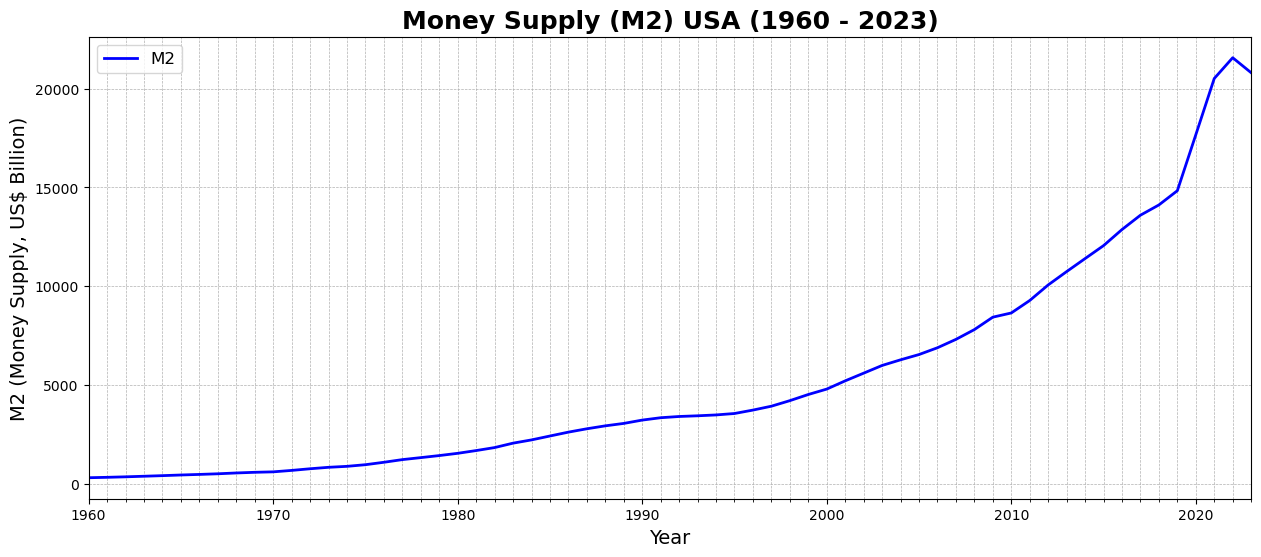

In [3]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `M2` 
df["M2"].plot(ax=ax, color="blue", linewidth=2, label="M2")

# Title and labels
plt.title("Money Supply (M2) USA (1960 - 2023)", fontsize=18, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("M2 (Money Supply, US$ Billion)", fontsize=14)

# Format x-axis ticks for better readability (showing every 10 years)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Add grid for better readability
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Add a legend
plt.legend(loc="upper left", fontsize=12)


# Show the plot
plt.show()

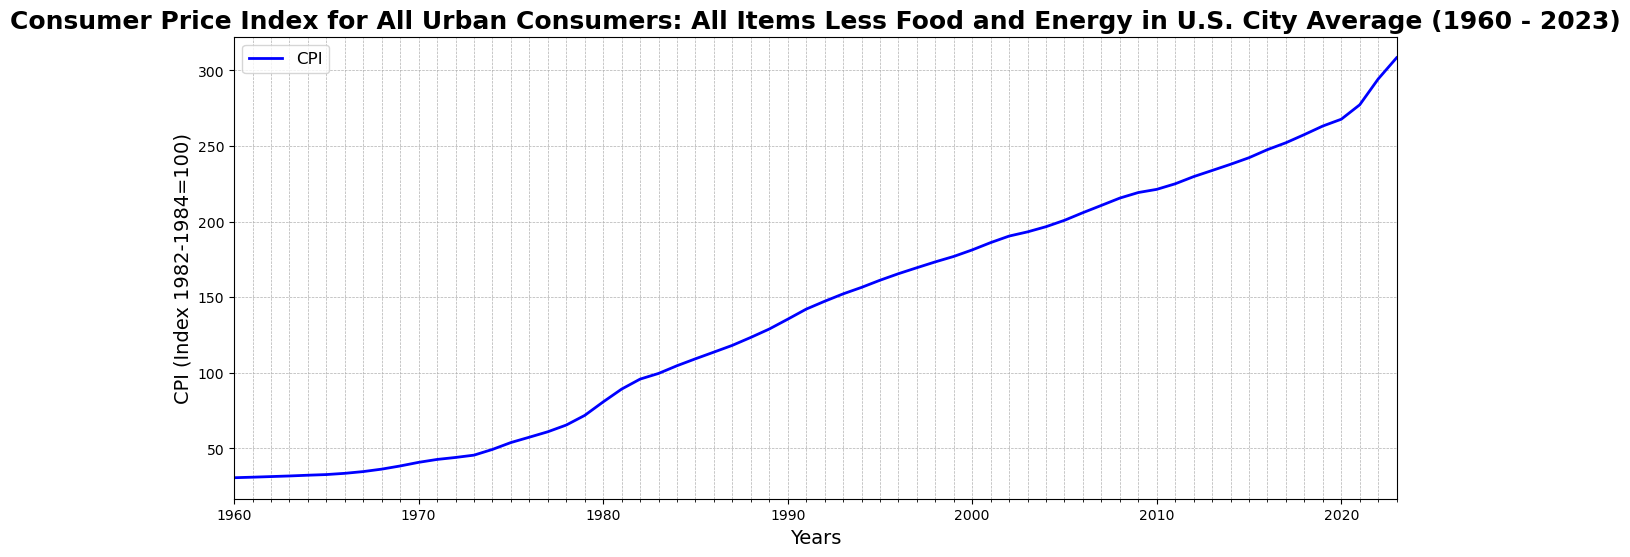

In [4]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `CPI` 
df["CCPI"].plot(ax=ax, color="blue", linewidth=2, label="CPI")

# Title and labels
plt.title("Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average (1960 - 2023)", fontsize=18, fontweight='bold')
plt.xlabel("Years", fontsize=14)
plt.ylabel("CPI (Index 1982-1984=100)", fontsize=14)

# Format x-axis ticks for better readability (showing every 10 years)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Add grid for better readability
ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(loc="upper left", fontsize=12)

# Show the plot
plt.show()

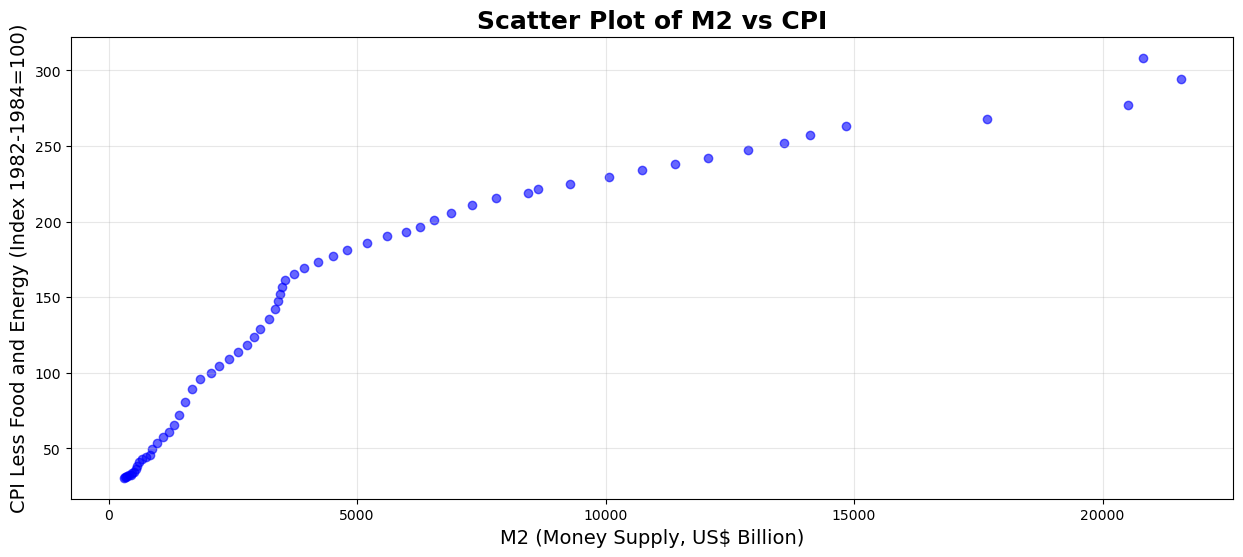

In [5]:
# Plot the figure
plt.figure(figsize=(15, 6))
plt.scatter(df["M2"], df["CCPI"], alpha=0.6, color='b')

# Title and labels
plt.title("Scatter Plot of M2 vs CPI", fontsize=18, fontweight='bold')
plt.xlabel("M2 (Money Supply, US$ Billion)", fontsize=14)
plt.ylabel("CPI Less Food and Energy (Index 1982-1984=100)", fontsize=14)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

In [6]:
# Correlation matrix
df.corr()

,CCPI,M2
CCPI,1.000000,0.906403
M2,0.906403,1.000000


## Split

In [7]:
features = ["M2"]
target = "CCPI"

X_train = df[features]
y_train = df[target]

# Build Model

## Baseline

In [8]:
# Mean Absolute Error baseline
mean_base_line = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, mean_base_line)
print("Baseline Mean Absolute Error:" , round(baseline_mae, 2))

Baseline Mean Absolute Error: 72.74


## Iterate

In [9]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate

In [10]:
# Calculate the Mean Absolute Error for the true 'y_train' values and the corresponding predictions by the model.
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Mean Absolute Error :" , round(mae, 2))

Mean Absolute Error : 30.77


In [11]:
# Dataframe containing true 'y' values and predicted 'y' values
data = pd.DataFrame({
    "y_train": y_train,  
    "y_pred": model.predict(X_train)  # Predicted values from the model
}, index=y_train.index)  # Retain the original index from y_train

print("data type:", type(data))
print()
print(data.info())
data.head()

data type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 1960-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y_train  64 non-null     float64
 1   y_pred   64 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB
None


,y_train,y_pred
Date,,
1960-01-01,30.642,73.768397
1961-01-01,31.000,74.048975
1962-01-01,31.400,74.395248
1963-01-01,31.808,74.799006
1964-01-01,32.300,75.205500


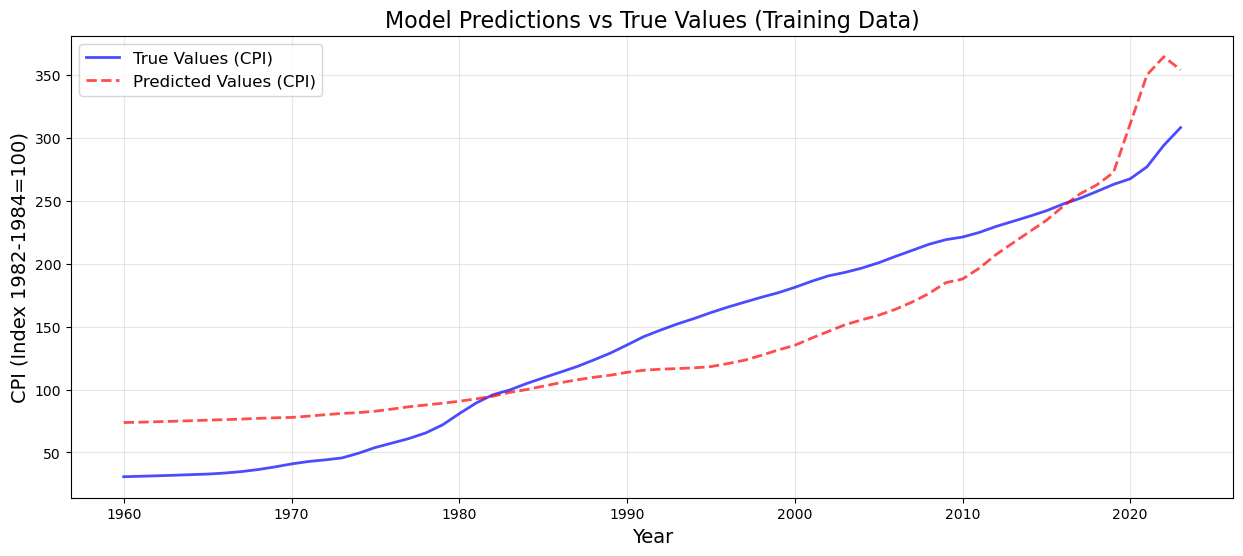

In [12]:
plt.figure(figsize=(15, 6))

# Plot true `y_train` values
plt.plot(data.index, data["y_train"], label="True Values (CPI)", color="blue", linewidth=2, alpha=0.7)

# Plot predicted `y` values
plt.plot(data.index, data["y_pred"], label="Predicted Values (CPI)", color="red", linestyle="--", linewidth=2, alpha=0.7)

# Add title, labels, and legend
plt.title("Model Predictions vs True Values (Training Data)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CPI (Index 1982-1984=100)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [13]:
# Save the model as a pickle file
joblib.dump(model, "ccpi_model.pkl")

['ccpi_model.pkl']

## Communicate Results

In [14]:
# Extract intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_[0]

# Communicate results
print("### Linear Regression Model Summary ###")
print()
print(f"The trained linear regression model is as follows:")
print()
print(f"    CPI Less Food and Energy (Inflation) = {intercept:.2f} + ({coefficient:.6f}) * M2 (Money Supply)")
print()
print("Key Points:")
print(f"- The intercept is {intercept:.2f}, which represents the baseline CPI when M2 is zero.")
print(f"- The coefficient is {coefficient:.6f}, indicating that for every one-unit increase in M2, the CPI is expected to increase by approximately {coefficient:.6f} units.")
print()
print("The model has been successfully trained and shows a clear linear relationship between CPI and M2.")

### Linear Regression Model Summary ###

The trained linear regression model is as follows:

    CPI Less Food and Energy (Inflation) = 69.60 + (0.013687) * M2 (Money Supply)

Key Points:
- The intercept is 69.60, which represents the baseline CPI when M2 is zero.
- The coefficient is 0.013687, indicating that for every one-unit increase in M2, the CPI is expected to increase by approximately 0.013687 units.

The model has been successfully trained and shows a clear linear relationship between CPI and M2.


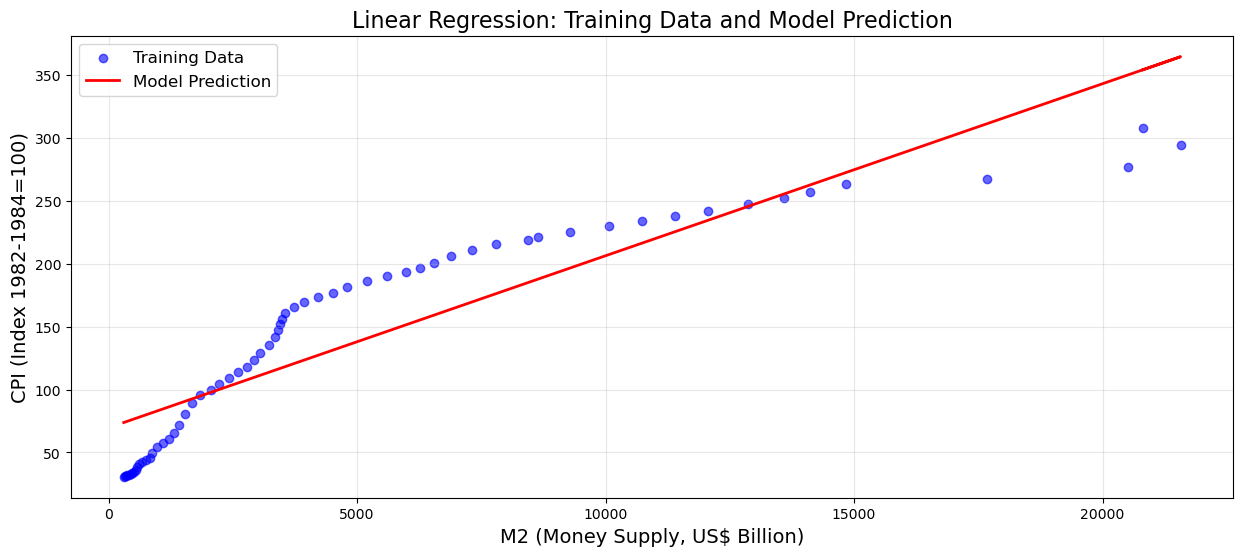

In [15]:
plt.figure(figsize=(15, 6))

# Scatter plot for the training data
plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Training Data")

# Line plot for the model's predictions
plt.plot(X_train, model.predict(X_train), color="red", linewidth=2, label="Model Prediction")

# Add labels, title, and legend
plt.title("Linear Regression: Training Data and Model Prediction", fontsize=16)
plt.xlabel("M2 (Money Supply, US$ Billion)", fontsize=14)
plt.ylabel("CPI (Index 1982-1984=100)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()